# Problem Statement

Importing the Dependencies

In [36]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix


# Loading the Dataset from kaggle

In [2]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

100%|██████████| 163M/163M [00:01<00:00, 166MB/s]

Extracting files...


In [3]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os
# import shutil

# # The 'path' variable holds the base directory of the downloaded dataset
# # from the previous kagglehub.dataset_download step.
# # The actual image data is typically found in a 'data' subdirectory within this path.
# base_input_path = os.path.join(path, "data") # Corrected base input path
# with_mask_src = os.path.join(base_input_path, "with_mask")
# without_mask_src = os.path.join(base_input_path, "without_mask")

# base_output_path = "/kaggle/working/all_images"
# with_mask_dst = os.path.join(base_output_path, "with_mask")
# without_mask_dst = os.path.join(base_output_path, "without_mask")

# # Create destination folders
# os.makedirs(with_mask_dst, exist_ok=True)
# os.makedirs(without_mask_dst, exist_ok=True)

# # Copy with_mask images if the destination directory is empty (to avoid redundant copies on re-execution)
# if not os.listdir(with_mask_dst):
#     for img in os.listdir(with_mask_src):
#         src_file = os.path.join(with_mask_src, img)
#         dst_file = os.path.join(with_mask_dst, img)
#         shutil.copy(src_file, dst_file)

# # Copy without_mask images if the destination directory is empty
# if not os.listdir(without_mask_dst):
#     for img in os.listdir(without_mask_src):
#         src_file = os.path.join(without_mask_src, img)
#         dst_file = os.path.join(without_mask_dst, img)
#         shutil.copy(src_file, dst_file)

# # Get the list of images in the with_mask directory
# with_mask_images = os.listdir(with_mask_dst)

# # Check if there are any images in the directory
# if with_mask_images:
#     # Get the first image name
#     first_image_name = with_mask_images[0]
#     # Construct the full path to the first image
#     first_image_path = os.path.join(with_mask_dst, first_image_name)

#     # Display the image
#     img = mpimg.imread(first_image_path)
#     plt.imshow(img)
#     plt.axis('off') # Hide axes
#     plt.title(f'First Image: {first_image_name}')
#     plt.show()
# else:
#     print(f"No images found in {with_mask_dst} after ensuring setup.")

In [5]:
import os
import shutil

# Source paths (read-only)
# Use the 'path' variable from kagglehub.dataset_download
base_input_path = os.path.join(path, "data")
with_mask_src = os.path.join(base_input_path, "with_mask")
without_mask_src = os.path.join(base_input_path, "without_mask")

# Destination paths (writable)
base_output_path = "/kaggle/working/all_images"
with_mask_dst = os.path.join(base_output_path, "with_mask")
without_mask_dst = os.path.join(base_output_path, "without_mask")

# Create destination folders
os.makedirs(with_mask_dst, exist_ok=True)
os.makedirs(without_mask_dst, exist_ok=True)

# Copy with_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(with_mask_dst):
    for img in os.listdir(with_mask_src):
        src_file = os.path.join(with_mask_src, img)
        dst_file = os.path.join(with_mask_dst, img)
        shutil.copy(src_file, dst_file)

# Copy without_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(without_mask_dst):
    for img in os.listdir(without_mask_src):
        src_file = os.path.join(without_mask_src, img)
        dst_file = os.path.join(without_mask_dst, img)
        shutil.copy(src_file, dst_file)

print("With mask images:", len(os.listdir(with_mask_dst)))
print("Without mask images:", len(os.listdir(without_mask_dst)))


With mask images: 3725
Without mask images: 3828


In [6]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

In [7]:
import os
import shutil

# Source paths (read-only)
# Use the 'path' variable from kagglehub.dataset_download
base_input_path = os.path.join(path, "data")
with_mask_src = os.path.join(base_input_path, "with_mask")
without_mask_src = os.path.join(base_input_path, "without_mask")

# Destination paths (writable)
base_output_path = "/kaggle/working/all_images"
with_mask_dst = os.path.join(base_output_path, "with_mask")
without_mask_dst = os.path.join(base_output_path, "without_mask")

# Create destination folders
os.makedirs(with_mask_dst, exist_ok=True)
os.makedirs(without_mask_dst, exist_ok=True)

# Copy with_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(with_mask_dst):
    for img in os.listdir(with_mask_src):
        src_file = os.path.join(with_mask_src, img)
        dst_file = os.path.join(with_mask_dst, img)
        shutil.copy(src_file, dst_file)

# Copy without_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(without_mask_dst):
    for img in os.listdir(without_mask_src):
        src_file = os.path.join(without_mask_src, img)
        dst_file = os.path.join(without_mask_dst, img)
        shutil.copy(src_file, dst_file)

print("With mask images:", len(os.listdir(with_mask_dst)))
print("Without mask images:", len(os.listdir(without_mask_dst)))


With mask images: 3725
Without mask images: 3828


In [8]:
import os

# Paths are expected to be defined in a preceding cell
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

# Get and print the first five 'with mask' files
if os.path.exists(with_mask_path):
    with_mask_files = os.listdir(with_mask_path)
    print("First 5 'with mask' files:")
    for i in range(min(5, len(with_mask_files))):
        print(with_mask_files[i])
else:
    print(f"Directory not found: {with_mask_path}")

print("\n") # Add a newline for better readability

# Get and print the first five 'without mask' files
if os.path.exists(without_mask_path):
    without_mask_files = os.listdir(without_mask_path)
    print("First 5 'without mask' files:")
    for i in range(min(5, len(without_mask_files))):
        print(without_mask_files[i])
else:
    print(f"Directory not found: {without_mask_path}")

First 5 'with mask' files:
with_mask_2632.jpg
with_mask_12.jpg
with_mask_3251.jpg
with_mask_2711.jpg
with_mask_32.jpg


First 5 'without mask' files:
without_mask_1208.jpg
without_mask_2362.jpg
without_mask_756.jpg
without_mask_2493.jpg
without_mask_1030.jpg


In [9]:
import os

# Paths are expected to be defined in a preceding cell
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

# Get and print the first five 'with mask' files
if os.path.exists(with_mask_path):
    with_mask_files = os.listdir(with_mask_path)
    print("First 5 'with mask' files:")
    for i in range(min(5, len(with_mask_files))):
        print(with_mask_files[i])
else:
    print(f"Directory not found: {with_mask_path}")

print("\n") # Add a newline for better readability

# Get and print the first five 'without mask' files
if os.path.exists(without_mask_path):
    without_mask_files = os.listdir(without_mask_path)
    print("First 5 'without mask' files:")
    for i in range(min(5, len(without_mask_files))):
        print(without_mask_files[i])
else:
    print(f"Directory not found: {without_mask_path}")

First 5 'with mask' files:
with_mask_2632.jpg
with_mask_12.jpg
with_mask_3251.jpg
with_mask_2711.jpg
with_mask_32.jpg


First 5 'without mask' files:
without_mask_1208.jpg
without_mask_2362.jpg
without_mask_756.jpg
without_mask_2493.jpg
without_mask_1030.jpg


In [10]:
import os
import shutil

# Source paths (read-only)
# Use the 'path' variable from kagglehub.dataset_download
base_input_path = os.path.join(path, "data")
with_mask_src = os.path.join(base_input_path, "with_mask")
without_mask_src = os.path.join(base_input_path, "without_mask")

# Destination paths (writable)
base_output_path = "/kaggle/working/all_images"
with_mask_dst = os.path.join(base_output_path, "with_mask")
without_mask_dst = os.path.join(base_output_path, "without_mask")

# Create destination folders
os.makedirs(with_mask_dst, exist_ok=True)
os.makedirs(without_mask_dst, exist_ok=True)

# Copy with_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(with_mask_dst):
    for img in os.listdir(with_mask_src):
        src_file = os.path.join(with_mask_src, img)
        dst_file = os.path.join(with_mask_dst, img)
        shutil.copy(src_file, dst_file)

# Copy without_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(without_mask_dst):
    for img in os.listdir(without_mask_src):
        src_file = os.path.join(without_mask_src, img)
        dst_file = os.path.join(without_mask_dst, img)
        shutil.copy(src_file, dst_file)

print("With mask images:", len(os.listdir(with_mask_dst)))
print("Without mask images:", len(os.listdir(without_mask_dst)))


With mask images: 3725
Without mask images: 3828


In [20]:
with_mask_files = os.listdir(with_mask_dst)
without_mask_files = os.listdir(without_mask_dst)
print(with_mask_files)
print(without_mask_files)

['with_mask_2632.jpg', 'with_mask_12.jpg', 'with_mask_3251.jpg', 'with_mask_2711.jpg', 'with_mask_32.jpg', 'with_mask_79.jpg', 'with_mask_3484.jpg', 'with_mask_590.jpg', 'with_mask_1004.jpg', 'with_mask_2738.jpg', 'with_mask_2595.jpg', 'with_mask_1851.jpg', 'with_mask_3361.jpg', 'with_mask_168.jpg', 'with_mask_3443.jpg', 'with_mask_402.jpg', 'with_mask_3034.jpg', 'with_mask_2762.jpg', 'with_mask_1051.jpg', 'with_mask_3375.jpg', 'with_mask_82.jpg', 'with_mask_2642.jpg', 'with_mask_3006.jpg', 'with_mask_3636.jpg', 'with_mask_3336.jpg', 'with_mask_1887.jpg', 'with_mask_1148.jpg', 'with_mask_2246.jpg', 'with_mask_3329.jpg', 'with_mask_1544.jpg', 'with_mask_3037.jpg', 'with_mask_1418.jpg', 'with_mask_2400.jpg', 'with_mask_59.jpg', 'with_mask_2516.jpg', 'with_mask_1231.jpg', 'with_mask_3263.jpg', 'with_mask_2639.jpg', 'with_mask_3331.jpg', 'with_mask_560.jpg', 'with_mask_1568.jpg', 'with_mask_1509.jpg', 'with_mask_1086.jpg', 'with_mask_3016.jpg', 'with_mask_1994.jpg', 'with_mask_461.jpg', 'w

In [11]:
import os

# Paths are expected to be defined in a preceding cell
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

# Get and print the first five 'with mask' files
if os.path.exists(with_mask_path):
    with_mask_files = os.listdir(with_mask_path)
    print("First 5 'with mask' files:")
    for i in range(min(5, len(with_mask_files))):
        print(with_mask_files[i])
else:
    print(f"Directory not found: {with_mask_path}")

print("\n") # Add a newline for better readability

# Get and print the first five 'without mask' files
if os.path.exists(without_mask_path):
    without_mask_files = os.listdir(without_mask_path)
    print("First 5 'without mask' files:")
    for i in range(min(5, len(without_mask_files))):
        print(without_mask_files[i])
else:
    print(f"Directory not found: {without_mask_path}")

First 5 'with mask' files:
with_mask_2632.jpg
with_mask_12.jpg
with_mask_3251.jpg
with_mask_2711.jpg
with_mask_32.jpg


First 5 'without mask' files:
without_mask_1208.jpg
without_mask_2362.jpg
without_mask_756.jpg
without_mask_2493.jpg
without_mask_1030.jpg


# Creating Labels for the two class of images


with mask - 1
without mask - 0


In [12]:
#create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Display the images

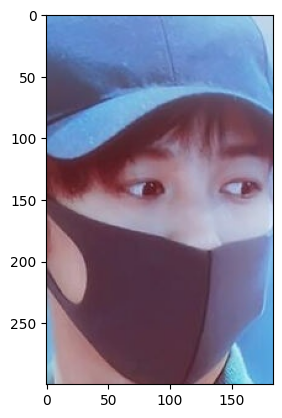

In [15]:
img = mpimg.imread('/kaggle/working/all_images/with_mask/with_mask_192.jpg')
imgplot = plt.imshow(img)
plt.show()
# plt.imshow(img)

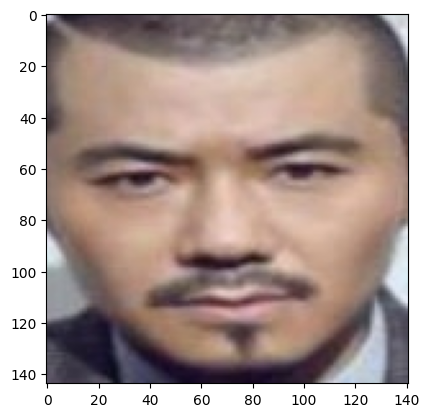

In [16]:
# without masks
img = mpimg.imread('/kaggle/working/all_images/without_mask/without_mask_192.jpg')
imgplot = plt.imshow(img)
plt.show()
# plt.imshow(img)

# Image processing

resize and convert to numpy arrays

In [21]:
#converting to numpy arrays
with_mask_path = '/kaggle/working/all_images/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/working/all_images/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
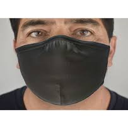

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to nuppy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
print(Y)

[1 1 1 ... 0 0 0]


# Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape,X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [41]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [199, 199, 200],
        [197, 198, 200],
        [199, 199, 201]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [198, 198, 198],
        [199, 199, 201],
        [199, 199, 201]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [207, 205, 203],
        [199, 198, 199],
        [199, 199, 201]],

       ...,

       [[171, 171, 171],
        [171, 171, 171],
        [173, 173, 173],
        ...,
        [213, 185, 181],
        [209, 180, 173],
        [209, 182, 171]],

       [[172, 169, 170],
        [173, 169, 170],
        [173, 171, 171],
        ...,
        [210, 187, 183],
        [209, 181, 175],
        [207, 180, 169]],

       [[172, 166, 168],
        [172, 167, 169],
        [174, 169, 170],
        ...,
        [216, 201, 197],
        [206, 182, 175],
        [206, 179, 168]]], dtype=uint8)
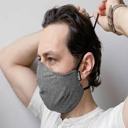

In [42]:
X_train[0]

In [43]:
X_train_scaled[0]

array([[[0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.78039216, 0.78039216, 0.78431373],
        [0.77254902, 0.77647059, 0.78431373],
        [0.78039216, 0.78039216, 0.78823529]],

       [[0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.77647059, 0.77647059, 0.77647059],
        [0.78039216, 0.78039216, 0.78823529],
        [0.78039216, 0.78039216, 0.78823529]],

       [[0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.81176471, 0.80392157, 0.79607843],
        [0.78039216, 0.77647059, 0.78039216],
        [0.78039216, 0.78039216, 0.78823529]],

       ...,

       [[0.67058824, 0.67058824, 0.67058824],
        [0.67058824, 0.67058824, 0.67058824],
        [0.67843137, 0

# Building the Convolutional Neural Networks (CNN)**bold text**

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
num_of_classes = 2

# model = keras.Sequential([
#     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers
# ])

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# compile the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])



In [48]:
from IPython.core import history
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 154s 895ms/step - acc: 0.8585 - loss: 0.3356 - val_acc: 0.9273 - val_loss: 0.2027
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 190s 836ms/step - acc: 0.9100 - loss: 0.2211 - val_acc: 0.9355 - val_loss: 0.1685
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 138s 815ms/step - acc: 0.9394 - loss: 0.1475 - val_acc: 0.9339 - val_loss: 0.1601
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 166s 975ms/step - acc: 0.9602 - loss: 0.1085 - val_acc: 0.9190 - val_loss: 0.2495
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 194s 928ms/step - acc: 0.9641 - loss: 0.0932 - val_acc: 0.9372 - val_loss: 0.1752


# Model Evaluation

In [49]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - acc: 0.9358 - loss: 0.2137
Test Accuracy = 0.9272005558013916


Text(0.5, 0, 'epoch')

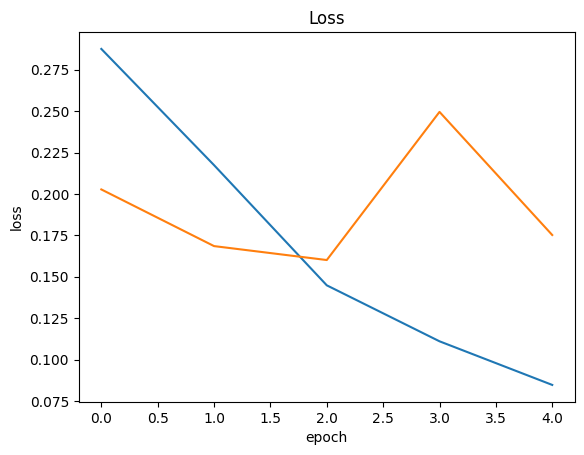

In [50]:
h = history

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

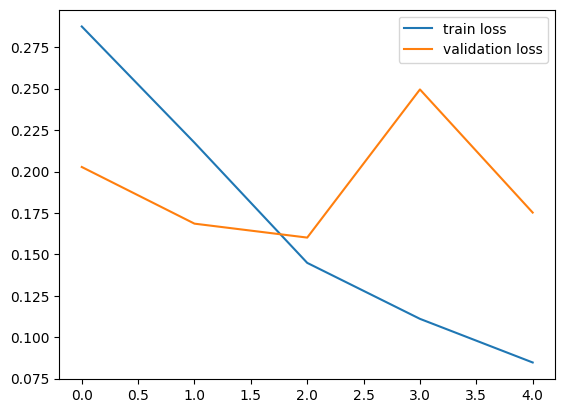

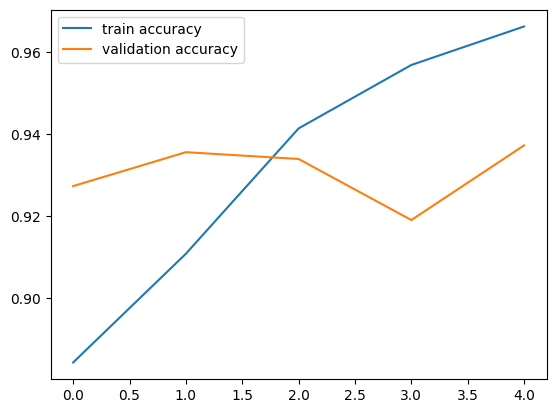

In [51]:
h = history
# plot the loss value
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of the image to be predicted:/content/without mask.jpeg


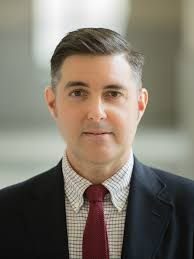

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.7067685  0.11282269]]
The person in the image is not wearing mask


In [60]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing mask')